# Final report for simulation program



## Introduction
this report will show the code of our program and explain the code how it works <br>
it is divided into 4 sections: <br>
- import
- SEIR equation
- class interface
- main window

Due to the fact that our group make an interative window that let users to chose the parameter, it is hard to show the plot directly <br> in the jupyter notebook. Thus, apart from showing the whole works, the plot part will be extracted from the class, and __show individually in the appendix__. 

## Import

In [24]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
import matplotlib.animation as animation
import tkinter as tk

In this program, 6 module were imported :
- matplotlib.pyplot to plot the graph
- solve_ivp to solve the differental equation
- FigureCanvasTkAgg to put the canvas on the frame
- numpy to set the range
- matplotlib.animation to plot the animation graph
- tkinter to create the interactive window


## SEIR model equation

In [25]:
def seir_model(t, y, beta, sigma, gamma):   
    S, E, I, R= y
    dSdt=-beta*I*S
    dEdt=-sigma*E+beta*I*S
    dIdt=-gamma*I+sigma*E
    dRdt=gamma*I
    return dSdt, dEdt, dIdt, dRdt

# set the inital value for the parameter
days=100  
beta=2.2/2.3
sigma=1/5.2
gamma=1/2.3
Tinc=5.2
Tinf=2.3
R0=2.2

This differental equation is called SEIR model of infectious disease progression. it is an mathematical model that will simulate the speard of the disease. <br> 
there are four parameter in the equation: __S E I R__ , and they relate to there parameters : __Tinc, Tinf, R0__ <br>
- Tinc is incubation period in days (in covid-19 it is usually 5.2 days )
- Tinf is infectious period in days (in covid-19 it is usually 2.3 days )
- R0 is the Reproduction Number (in covid-19 it is usually 2.2) <br>
the relation between the parameter is: <br> 
- sigma=1/Tinc
- gamma=1/Tinf
- beta= R0*gamma= R0/Tinf




## Class interface

###   init  function:

In [26]:
class interface:
    def __init__(self, master):
        # set the parameter that will be used in the window, it will be updated 
        # if the user enter different parameter it will change and plot different graphs
        self.days=days   
        self.beta=beta
        self.sigma=sigma
        self.gamma=gamma
        self.Tinc=Tinc
        self.Tinf=Tinf
        self.R0=R0
        
        # set the vari that will set the information show on the label and update when the para changes
        vari = tk.StringVar()
        self.vari=vari
        self.vari.set("the simulation days is now:100"
                    "\n incubation period is now: 5.2"
                     "\n infectious period is now: 2.3"
                     "\n Reproduction Number is now: 2.2")
        # create 2 frames next to each other
        frame_1 = tk.Frame(master, width=550, height=600)
        frame_1.pack(fill='both', side='left')

        frame_2 = tk.Frame(master, width=450, height=600)
        frame_2.pack(fill='both', side='right')

        # create a label on the frame 1
        label_tit=tk.Label(master=frame_1, text="select the parameter below:",foreground="black",font=('Calibri',20))
        label_tit.place(x=0,y=0)

        # 4 entries are set up to let user enter the parameters, they are placed at frame 1
        self.e1=tk.Entry(master=frame_1,show=None)
        self.e1.place(x=170,y=65)
        
        self.e2=tk.Entry(master=frame_1,show=None)
        self.e2.place(x=170,y=165)
        
        self.e3=tk.Entry(master=frame_1,show=None)
        self.e3.place(x=170,y=265)
        
        self.e4=tk.Entry(master=frame_1,show=None)
        self.e4.place(x=170,y=365)
        
        # 4 buttons are set up to let user apply the parameters they entered, they are placed at frame 1
        b_size=tk.Button(master=frame_1,text='apply',width=15,height=2,command=self.insert_days)
        b_size.place(x=360,y=50) 
        
        b_beta=tk.Button(master=frame_1,text='apply',width=15,height=2,command=self.insert_R0)
        b_beta.place(x=360,y=150)  
        
        b_sigma=tk.Button(master=frame_1,text='apply',width=15,height=2,command=self.insert_Tinc)
        b_sigma.place(x=360,y=250)
           
        b_gamma=tk.Button(master=frame_1,text='apply',width=15,height=2,command=self.insert_Tinf)
        b_gamma.place(x=360,y=350)
        
        # 4 labels are set up to show what are the  parameters, they are placed at frame 1
        label_size=tk.Label(master=frame_1, text="the number of days:",foreground="black",font=('Calibri',10))
        label_size.place(x=0,y=60)
        
        label_beta=tk.Label(master=frame_1, text="the value of R0:",foreground="black",font=('Calibri',10))
        label_beta.place(x=0,y=160)
        
        label_sigma=tk.Label(master=frame_1, text="the value of Tinc:",foreground="black",font=('Calibri',10))
        label_sigma.place(x=0,y=260)
        
        label_gamma=tk.Label(master=frame_1, text="the value of Tinf:",foreground="black",font=('Calibri',10))
        label_gamma.place(x=0,y=360)
        
        # this is a label that shows the parameter information, and it will be updated if user input new info
        label_exp=tk.Label(master=frame_1, textvariable =self.vari,foreground="black",font=('Calibri',10))
        label_exp.place(x=0,y=460)
        
        # the button to open the animated line graph
        btn = tk.Button(master=frame_2,
             text ="Click to open the animated line graph",
             command = self.openLineWindow)
        btn.place(x=0,y=100)
        
        # the button to open the pie chart annimation
        btn = tk.Button(master=frame_2,
             text ="Click to open the pie chart",
             command = self.openPieWindow)
        btn.place(x=0,y=180)
        
        # the button to open picture which compares different model.
        btn = tk.Button(master=frame_2,
             text ="Click to open different model comparasion pictures",
             command = self.callcompare)
        btn.place(x=0,y=500)
        
        # the button to open the line graph
        b_plot=tk.Button(master=frame_2,text='show line graph',width=15,height=2,command=self.graph)
        b_plot.place(x=0,y=0)

This function is the initial function in the class (interface). It shows the very beginning picture of the window layout.<br>
- __self.vari__ careats the initial values of variables and show on the bottom left cornor of the window.<br>
- __frame1__ and __frame_2__ split the initial window into to left and right two parts, where left frame shows all parameter data and right frames are bottons to see static and annimated graphs.<br>
- __label_exp__ can automacially update parameters' value and shown in the bottom left corner of the main window.<br>
- __btn__ create all buttons shown in __fremw_2__, all of them link to operations in functions below.

### parameter_explain function:

In [27]:
class interface(interface):
    def parameter_explain(self):
            self.vari.set(f"the simulation days is now: {self.days}"
                        f"\n incubation period is now: {self.Tinc}" 
                        f"\n infectious period is now: {self.Tinf}"
                        f"\n Reproduction Number is now: {self.R0}"
                        )

The function above is a function that will update the parameter information that user entered.
- use __f strings__ to show the content clearly, and __\n__ to change the line.
- use __vari.set__ to set the change of the information

### Input and Insert  functions

In [28]:
class interface(interface):
    def insert_days(self):
        var=self.e1.get()
        if var.isdigit()==False:
            tk.messagebox.showerror('Error', 'Error: the number of days can only be positive integers!')
        else:
            self.days=int(var)
            self.parameter_explain()

    def insert_R0(self):
        var=self.e2.get()
        try:
            float(var)
            if float(var)<0:
                tk.messagebox.showerror('Error', 'Error: the value of R0 can only be positive number!')
            else:
                self.R0=float(var)
                self.beta=float(var)*self.gamma
                self.parameter_explain()
        except ValueError:
            tk.messagebox.showerror('Error', 'Error: the value of R0 can only be positive number!')

    def insert_Tinc(self):
        var=self.e3.get()
        try:
            float(var)
            if float(var)<0:
                tk.messagebox.showerror('Error', 'Error: the value of Tinc can only be positive number!')
            else:
                self.Tinc=float(var)
                self.sigma=1/float(var)
                self.parameter_explain()
        except ValueError:
            tk.messagebox.showerror('Error', 'Error: the value of Tinc can only be positive number!')

    def insert_Tinf(self):
        var=self.e4.get()
        try:
            float(var)
            if float(var)<0:
                tk.messagebox.showerror('Error', 'Error: the value of Tinf can only be positive number!')
            else:
                self.Tinf=float(var)
                self.gamma=1/float(var)
                self.beta=self.R0*self.gamma
                self.parameter_explain()
        except ValueError:
            tk.messagebox.showerror('Error', 'Error: the value of Tinf can only be positive number!')

This set of 4 functions allows the input parameters (days, R0, T incubation, T infection) transfer to three differential euqaion variables (beta, gamma, sigma). It also contains the checking validity function, which make sure all the input are satisfied.<br>
- __insert_days()__ function uses __.isdigit()__ to make sure the input is postive integers.<br>
- __insert_R0()__, __insertTinc__ and __insert_Tinf()__ all used a format that test whether input is a float firstly, then test if it is positive, if any of one is not satidifed, the program will show an error messagebox, which remind them to provide positive numbers.<br>
- It is noticeable that there are only 3 variables with 4 inputs provided because __beta__ is determined by both __R0__ and __gamma__. 

### Static line graph function:

In [29]:
class interface(interface):
    def graph(self):
            '''
            the function below will produce a line graph based on the default parameter or the parameter 
            user entered.
            '''
            # the code below will return the solution of the seir differential equation as a list
            # the inital value is s0=0.99 e=0.01 i=0 r=0
            sol = solve_ivp(seir_model, [0,self.days], [1-1/20000, 1/20000, 0, 0], 
                        rtol=1e-6, args=(self.beta, self.sigma, self.gamma))

            # create a graph 
            fig = plt.figure(); ax = fig.gca()

            # plot the lines on the graph  according to the list above, 4 lines total 
            lines = ax.plot(sol.t, sol.y.T)

            #basic settings of the graph: legend, xlabel, ylabel, title and return the graph finally.
            ax.legend(lines, ['Susceptible', 'Exposed', 'Infected', 'Recovered']);
            ax.set_xlabel('days')
            ax.set_ylabel('proportion')
            ax.set_title('Line graph for SEIR model')
            return plt.gcf()

The function above will return a line graph if user click to show the line graph:<br>
- Line 9 to 10 use __solve_ivp__ module to solve the differental equation in x range [0,self.days], using intial value:<br>
  s0=1-1/20000, e0=1/20000, i0=0, r0=0 <br>
  it will use the present parameter value to solve the equaition and return the outcome as a list.<br>
- Line 16 plots the 4 lines according to the list, sol.t contains x axis value, sol.y.T contains S E I R value.
- Line 19-23 set the legend, x label,y label, title of the lines, and return the garph
-(the graph will be shown in the appendix)


### Animated line graph function:

In [30]:
 class interface(interface):
    def openLineWindow(self):
        '''
        This function helps to open a new window where it shows the SEIR animation line graph 
        based on the default parameter or the parameter user entered.
        '''
        
        # create a window to show the graph, set the title of the window.
        global LineWindow
        LineWindow = tk.Toplevel(main_window)
        LineWindow.title("Line graph for simulation")
        
        
        # create a frame on the window designed to put the canvas on it
        frame_x =tk.Frame(LineWindow)
        frame_x.pack(fill='both', side='left')
        
        # solve the differential equation, return a list
        sol = solve_ivp(seir_m, [0, self.days], [1-1/20000, 1/20000, 0, 0], 
                    rtol=1e-6, args=(self.beta, self.sigma, self.gamma))
        s, e, i, r = sol.y
        
        # record the lens of the list which will be used later
        x=len(sol.t)
        
        # set up the figure, subplot, and x, y axes range
        fig= plt.Figure() 
        axes = fig.add_subplot(111)
        axes.set_ylim(0, 1.1)
        axes.set_xlim(0, self.days)
        
        # plot the 4 lines according to the data returned from the anmation function below from the inital value
        line, =axes.plot(0, 1-1/20000,linewidth=2,color='blue')
        line1, =axes.plot(0, 1/20000,linewidth=2,color='black')
        line2, =axes.plot(0, 0,linewidth=2, color='red')
        line3, =axes.plot(0, 0,linewidth=2, color='green')
        
        # basic setting of the graph: the style of the graph, legend, xlabel, ylabel and title
        plt.style.use("ggplot")
        axes.legend(['Susceptible', 'Exposed', 'Infected', 'Recovered']);
        axes.set_xlabel('days')
        axes.set_ylabel('proportion of all')
        axes.set_title('Animation line graph for SEIR model')
        
        # create 5 empty lists that will be used to store x ,s,e,i,r value in the following function
        x1, y1, y2, y3, y4 = [], [], [], [], []
        
        def animate(a):
            '''
            this animate() function will set the data for the FuncAnimation, 
            update the data from the listed created above and return the 4 lines' data 
            ready to be plotted.
            '''
            x1.append((sol.t[a]))
            y1.append((s[a]))
            y2.append((e[a]))
            y3.append((i[a]))
            y4.append((r[a]))
            
            line.set_xdata(x1)
            line.set_ydata(y1)
            line1.set_xdata(x1)
            line1.set_ydata(y2)
            line2.set_xdata(x1)
            line2.set_ydata(y3)
            line3.set_xdata(x1)
            line3.set_ydata(y4)
            
            return line, line1, line2, line3, 
        
        #create a canvas that show the animation graph on the canvas
        canvas = FigureCanvasTkAgg(fig, master=frame_x)
        canvas.get_tk_widget().pack()
        
        # create animation using FuncAnimation
        anim = animation.FuncAnimation(fig, animate, np.arange(1, x), interval=25, repeat=False)
        
        # loop the window until the user close the window.
        LineWindow.mainloop()

The function above will open a new window showing an animated graph if user click to show the animated graph:<br>
- Line 9 use __tk.Toplevel()__ to create the toplevel windows which are directly managed by the window. the graph will be displayed on the window
- Line 15 create a frame_x using __tk.Frame__ on the window
- Line 19-21 create the result lists
- Line 27-30 is about the setting of graphs.(figure and subplot. x,y ranges)
- Line 33-36 use line, (if it is not used, the graph can't be shown properly), set the inital value, linewidth and color.
- Line 39-43 set the style of the graph "ggplot", set the legend, xy_label and title.
- Line 48-69 is a __animate()__ function that set the x,y data to line according to the list appended. this function will be used to generate the animation.
- Line 72-73 create a canvas using __FigureCanvasTkAgg()__ to show the figure which placed on the frame_x
- Line 76 use __animation.FuncAnimation__ to generate animation graph from the range 1 to x at an interval of 25
- Line 79 indicate that the window will run untill it is closed by the user.


### Pie chart animation function

In [35]:
class interface(interface):
    def openPieWindow(self):
        '''
        This function helps to open a new window where it shows the SEIR percentage of total Suspectable cases with different sets of data.
        '''
        #Create a new window what shows the pie chart animation 
        piewindow = tk.Toplevel(main_window)
        piewindow.title("Pie chart for stimulation")
        piewindow.geometry('600x600')
        #Create a new frame on the window
        frame_1 =tk.Frame(piewindow)
        frame_1.pack(fill='both')

        #Solve the differenial equation with the given input by the user.
        sol = solve_ivp(seir_m, [0, self.days], [0.99, 0.01, 0, 0], rtol=1e-6, args=(self.beta, self.sigma, self.gamma))

        #Create fours lists for different types of results.
        s, e, i, r = sol.y

        #Set default values for pie chart.
        plt.rcParams['font.size'] = 12
        plt.rcParams["figure.autolayout"] = True
        plt.rcParams["figure.figsize"] = [12, 8]

        #Plot the pie chart
        fig, ax = plt.subplots()

        def changingpie(num):
            '''
            This function helps to show the SEIR percentage of total Suspectable cases with different sets of data.
            '''
            # make sure previous axis data were wiped so that the new pie chart won't be messed up.
            ax.clear() 

            #Create lists of all variables needed for the pie chart animation.
            nums = [s[num], e[num], i[num], r[num]]
            labels = ['S', 'E', 'I', 'R']
            fulllabels = ['Susceptible percentage', 'Exposed percentage', 'Infectious percentage', 'Recovered percentage']
            colors = ['gold', 'green', 'violet', 'royalblue']
            zeroindex = []

            #Find indexes of number cannot shown on pie chart.
            for m in range(len(nums)):
                if nums[m] < 0.001:
                    zeroindex.append(m)

            #Reverse the elements inside the list so that lists can remove elemnts from larger indexes to smaller indexes.
            zeroindex1 = zeroindex[::-1]

            #Remove all elements coresponded with 0 in nums.
            for k in zeroindex1:
                labels.pop(k)
                fulllabels.pop(k)
                colors.pop(k)
                nums.pop(k)

            #Create a pie chart with certain value.
            pie = ax.pie(nums, labels=labels, colors=colors, autopct='%.1f%%', shadow = True)
            handles, marks = ax.get_legend_handles_labels()
            plt.legend(pie[0], fulllabels, loc = 'upper right')
            ax.axis('equal')
            ax.set_title('SEIR proportion for a certain Suspectable group',fontsize = 16)

        #Create a canvas so that function annimation can be shown on it. 
        canvas = FigureCanvasTkAgg(fig, master=frame_1)
        canvas.get_tk_widget().pack()

        #Create animation
        ani = animation.FuncAnimation(fig, changingpie, frames=len(s), repeat=False) 

        #Run tkinter event loop
        piewindow.mainloop()

This function was created in order to acheive the pie chart annimation on the canvas and put in a new window.<br> Line 5 to line 12 create a frame as a carrier of canvas on a new window. <br>
Line 15 to line 18 shows how results from differential equation stored in four lists (s, e, i, r)<br>
Line 21 to line 23 regulate the defult parameters for plot including figure size, layout and text size so that the plot will not too big or too small.<br>
Line 26 plot the pie chart.<br>
Line 28 to Line 62 shows a new function named 'changingpie', which realize the annimation of pie chart<br>
- ax.clear make sure every time when loop begins, data should be cleared so that value on pie chart can be changed.<br>
- __nums__ is a list contain 4 numbers represent s,e,i,r percentage.<br>
- __labels__ is a list of S,E,I,R to show near pie chart because they are succinct. Whereas __fulllabels__ is used to show full labels on legend.<br>
- __zeroindex__ was firstly created as empty list, it stores the index of elements in __nums__ that are too small and we do not want them shown on pie chart. (Threshold is 0.0001).<br>
- __zeroindex1__ is just a list same as __zeroindex__ with all elements order reversed. Because we want to eliminate those small numbers and their correspondings in lists, eliminate them from bigger index to smaller index will make no change of the existing indexs. <br>

Line 65 and line 66 create the canvas on frame.<br>
Line 69 create the animation, where 'frames' express how many times this animation data will be checked, it should be euqal to the number of element inside any list among s,e,i or r.<br>
Line 72, __.mainloop()__ makes sure the window always stay open unitil closed by user.<br> 
*The annimated pie chart will be shown in the appendix.

### Show models comparasion picture function

In [38]:
class interface(interface):
    def callcompare(self):
            '''
            Show a new window contains a static graph, which comparing SI, SIR and SIS models.
            ''' 
            #Set new window size and title.
            comparewindow = tk.Toplevel(main_window)
            comparewindow.title("Compare 3 models")
            comparewindow.geometry('700x600')

            #Use Label to show the picture saved in the same directory.
            pic = tk.PhotoImage(file = 'compare.png')
            label_img = tk.Label(comparewindow, image = pic)
            label_img.pack()

            #Run tkinter event loop
            comparewindow.mainloop()

This function will present a new window, in which a graph that compares SI, SIS and SEIR three models will be shown.<br>
This graph was saved in the same directory as a png file, so __tk.PhotoImage(file = 'compare.png')__ can be used directly.

## Main window

In [40]:
# create a window
main_window = tk.Tk()

# basic setting of the window: the sizw of the window and the title of the window
main_window.title('simulation for COVID-19')

# create a label, set the width height and font and show it on the window
main_window.geometry('1000x700')
label= tk.Label(text='simulated graph for COVID-19',font=('Arial',25),
                 width=33,height=1)
label.pack()

# use class interface to show two frames and achieve the interactive function
interface(main_window)

main_window.mainloop()

The code above creates the main window, set the title size and a label showing simulated graph for COVID-19.
- use __interface class__ created above to show the content like the picture below: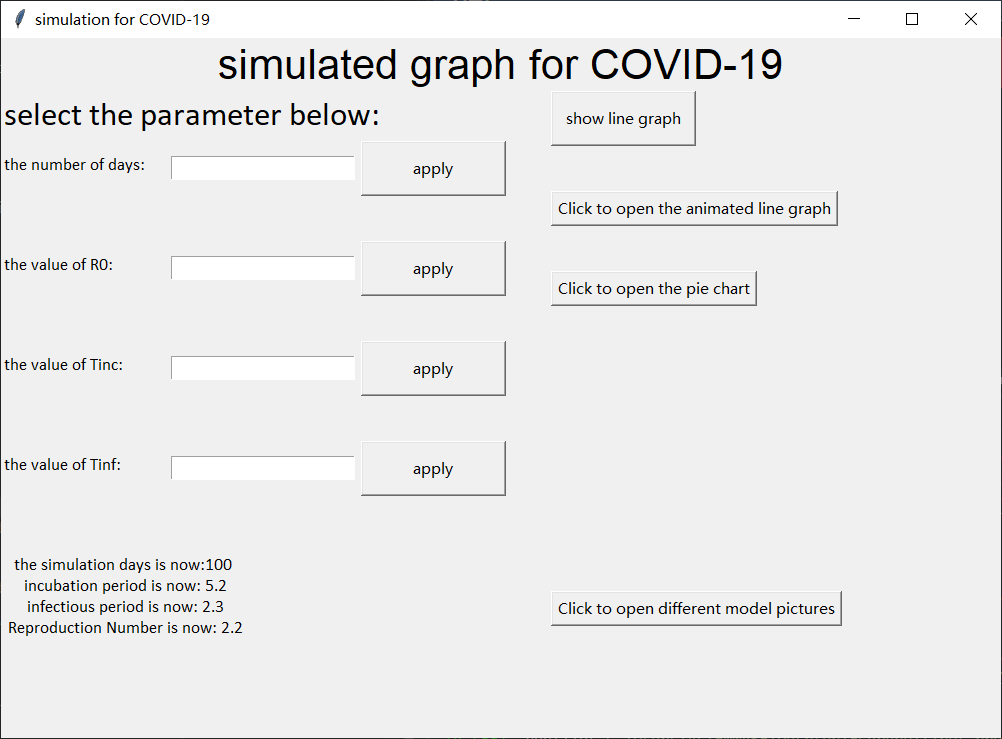

## Appendix (graph show)


The graphs in the appendix and the code is slightly adjusted to pull it out of class. However, they almost share the same code.<br>the graphs use the inital parameter value in the appendix.Parameter can be changed in the window when the program running in Spyder.

###  1.Animated line graph

<IPython.core.display.Javascript object>


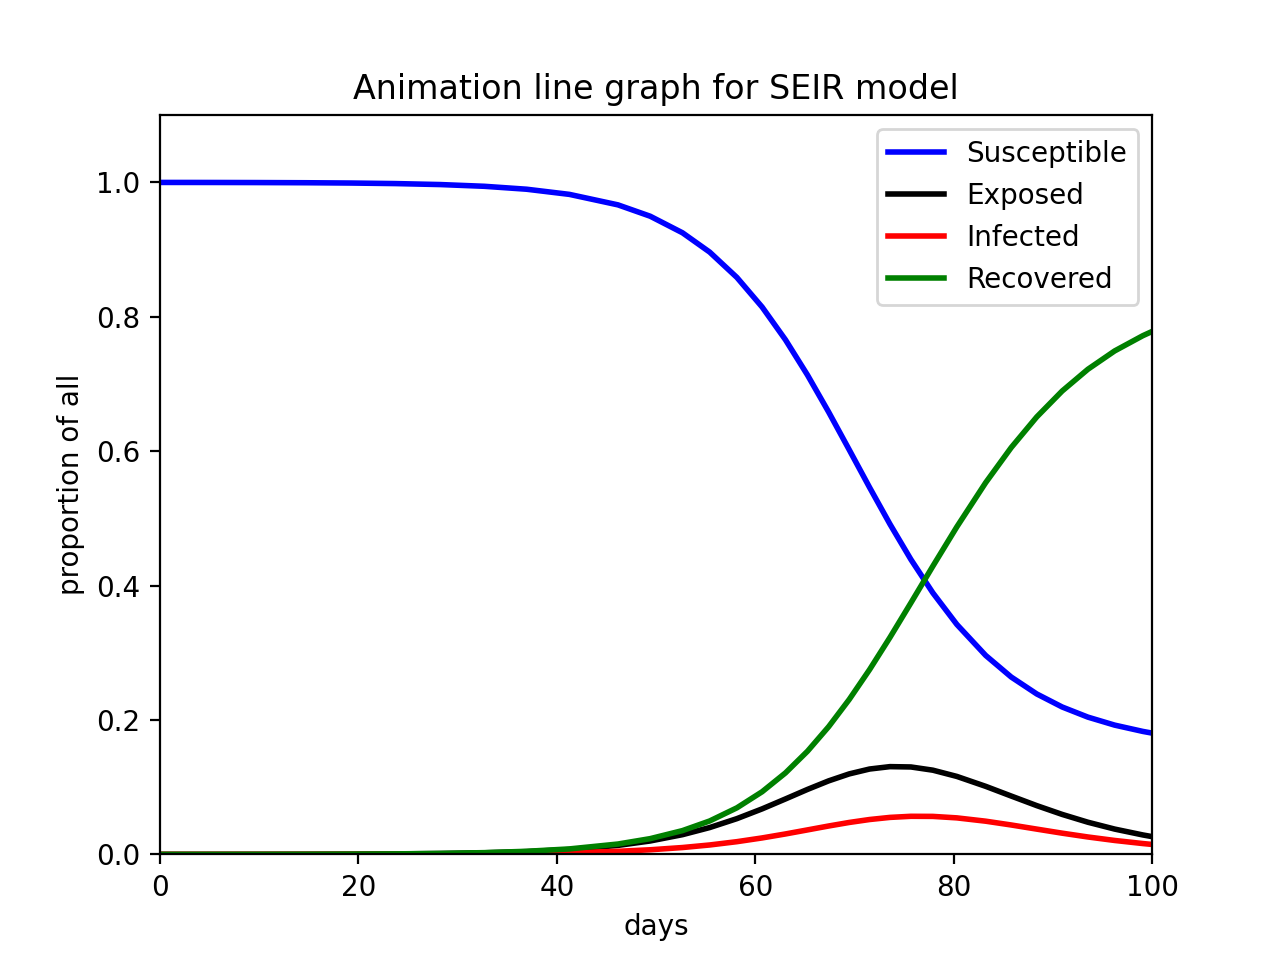

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt	
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.animation as animation


days=100  
beta=2.2/2.3
sigma=1/5.2
gamma=1/2.3
Tinc=5.2
Tinf=2.3
R0=2.2


def seir_m(t, y, beta, sigma, gamma):   
    S, E, I, R= y
    dSdt=-beta*I*S
    dEdt=-sigma*E+beta*I*S
    dIdt=-gamma*I+sigma*E
    dRdt=gamma*I
    return dSdt, dEdt, dIdt, dRdt


sol = solve_ivp(seir_m, [0, days], [1-1/20000, 1/20000, 0, 0], 
                    rtol=1e-6, args=(beta, sigma, gamma))
s, e, i, r = sol.y

# record the lens of the list which will be used later

# set up the figure, and x, y axes range
fig, axes = plt.subplots()
axes.set_ylim(0, 1.1)
axes.set_xlim(0, days)

# plot the 4 lines according to the data returned from the anmation function below from the inital value
line, =axes.plot(0, 0.99,linewidth=2,color='blue')
line1, =axes.plot(0, 0.01,linewidth=2,color='black')
line2, =axes.plot(0, 0,linewidth=2, color='red')
line3, =axes.plot(0, 0,linewidth=2, color='green')

x=len(sol.t)
 
# basic setting of the graph: the style of the graph, legend, xlabel, ylabel and title
axes.legend(['Susceptible', 'Exposed', 'Infected', 'Recovered']);
axes.set_xlabel('days')
axes.set_ylabel('proportion of all')
axes.set_title('Animation line graph for SEIR model')

# create 5 empty lists that will be used to store x ,s,e,i,r value in the following function
x1, y1, y2, y3, y4 = [], [], [], [], []

def animate(a):
    '''
    this animate() function will set the data for the FuncAnimation, 
    update the data from the listed created above and return the 4 lines' data 
    ready to be plotted.
    '''
    x1.append((sol.t[a]))
    y1.append((s[a]))
    y2.append((e[a]))
    y3.append((i[a]))
    y4.append((r[a]))

    line.set_xdata(x1)
    line.set_ydata(y1)
    line1.set_xdata(x1)
    line1.set_ydata(y2)
    line2.set_xdata(x1)
    line2.set_ydata(y3)
    line3.set_xdata(x1)
    line3.set_ydata(y4)

    return line, line1, line2, line3, 

# create animation using FuncAnimation
anim= animation.FuncAnimation(fig, animate, np.arange(1, x), interval=25, repeat=False)


### 2. Line graph

<IPython.core.display.Javascript object>


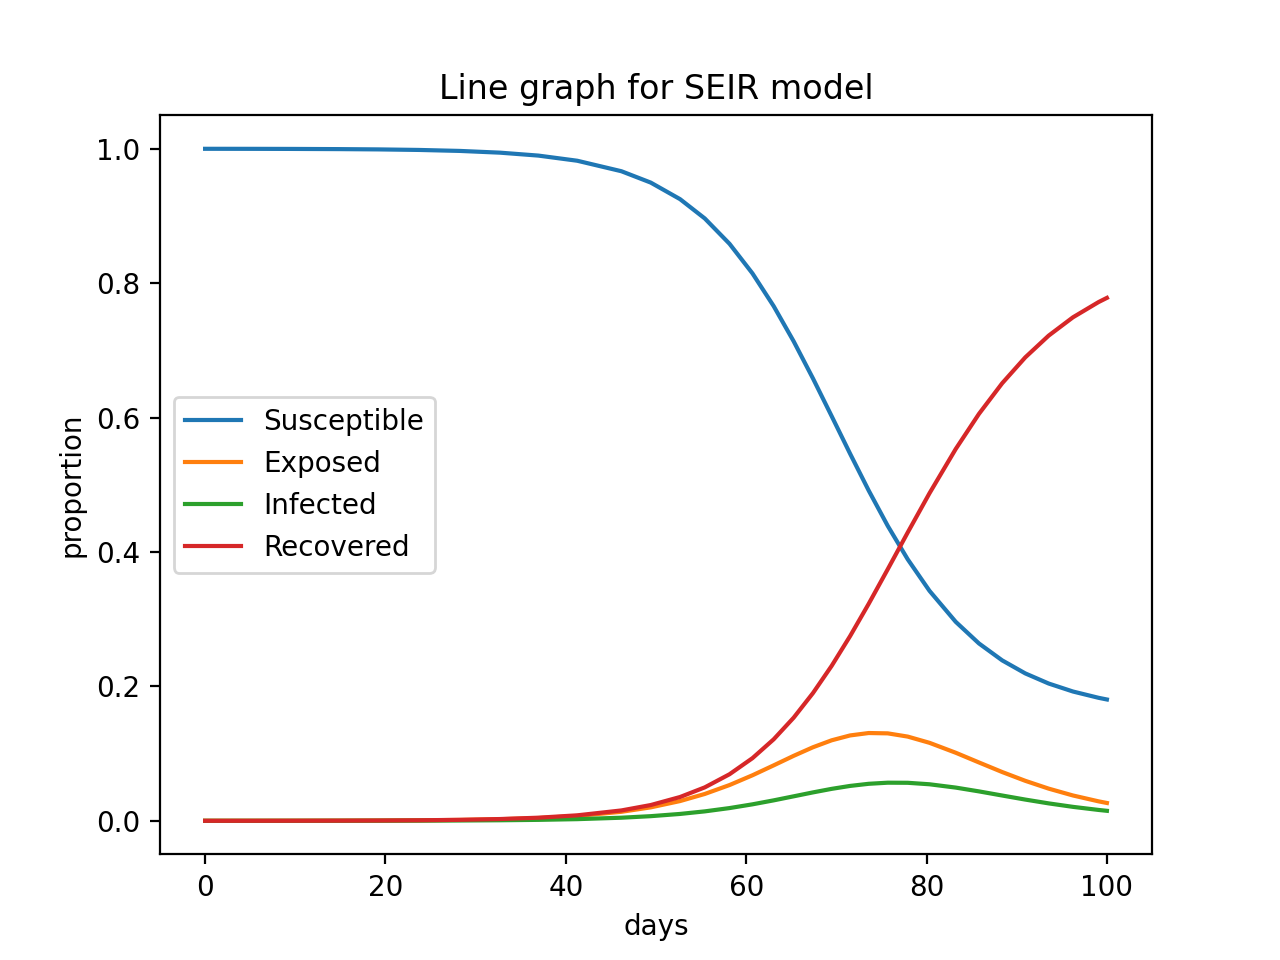

In [5]:
sol = solve_ivp(seir_m, [0,days], [1-1/20000, 1/20000, 0, 0], 
                    rtol=1e-6, args=(beta, sigma, gamma))
        
# create a graph 
fig = plt.figure(); ax = fig.gca()

# plot the lines on the graph  according to the list above, 4 lines total 
lines = ax.plot(sol.t, sol.y.T)

#basic settings of the graph: legend, xlabel, ylabel, title and return the graph finally.
ax.legend(lines, ['Susceptible', 'Exposed', 'Infected', 'Recovered']);
ax.set_xlabel('days')
ax.set_ylabel('proportion')
ax.set_title('Line graph for SEIR model')
plt.show()

### 3. Pie chart

<IPython.core.display.Javascript object>


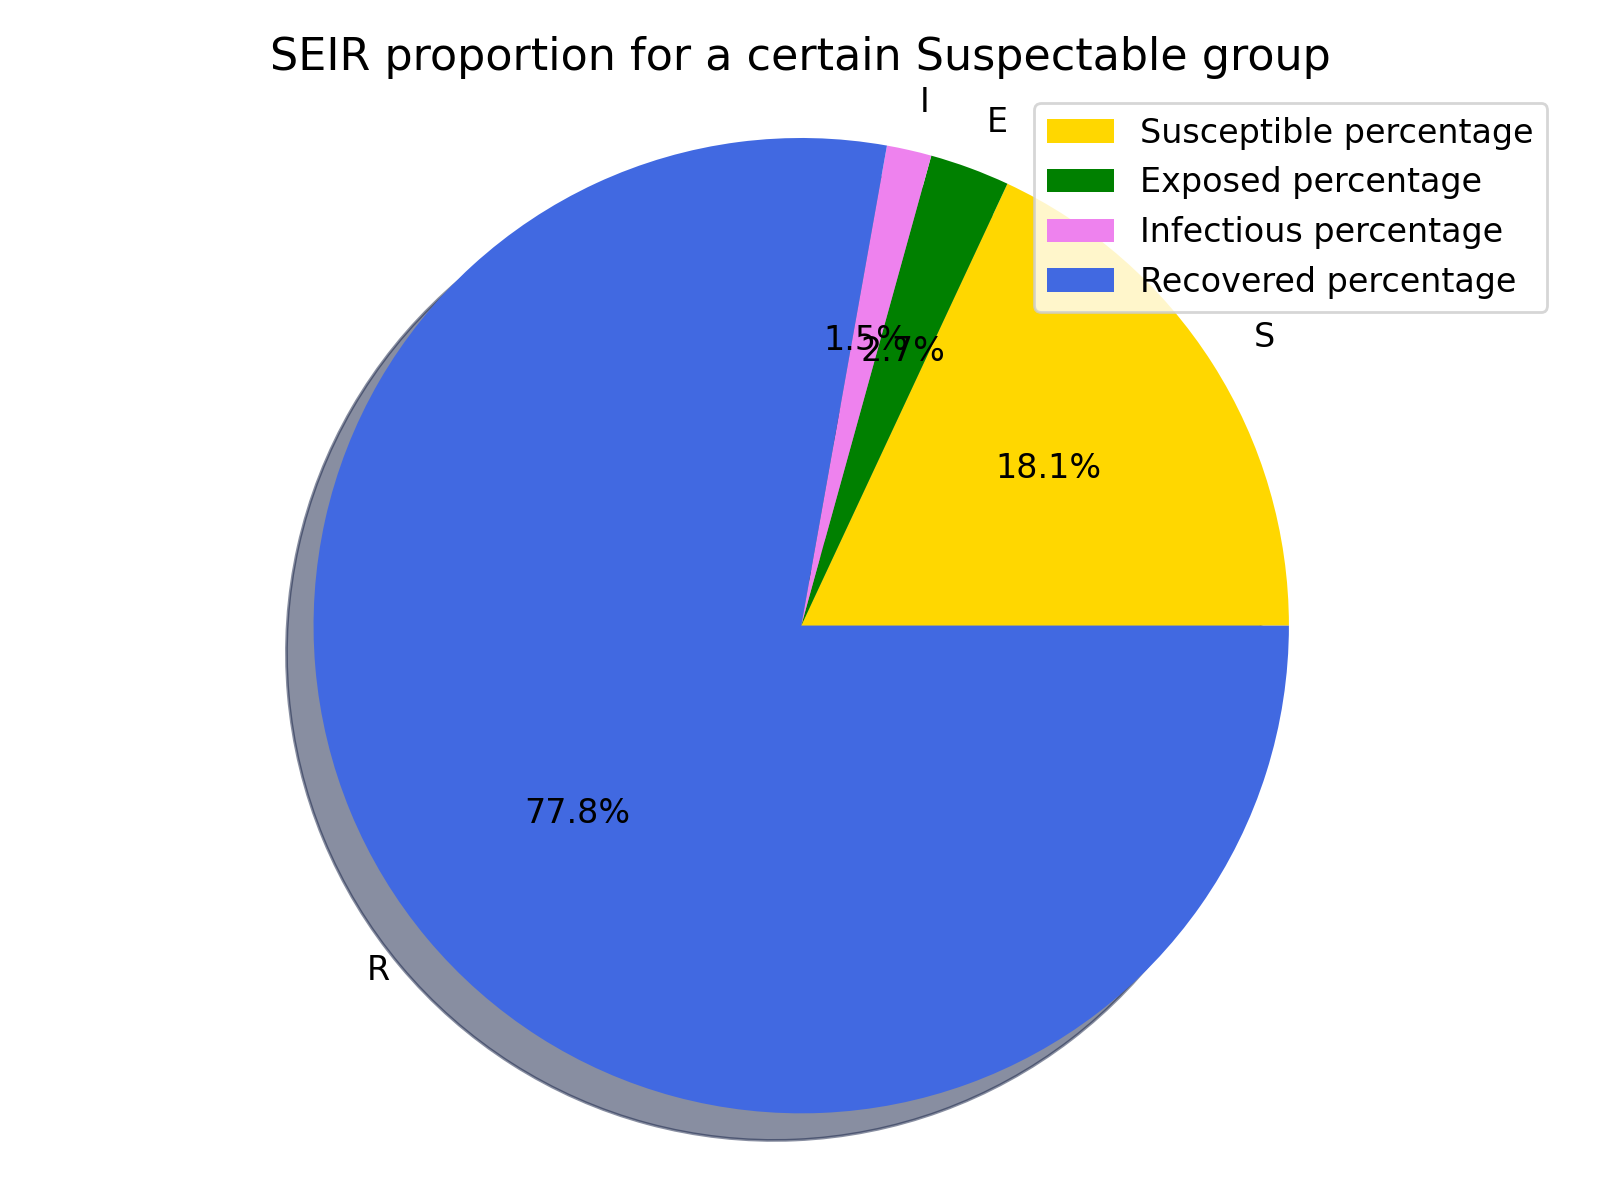

In [14]:
%matplotlib notebook
import matplotlib.pyplot as plt	
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.animation as animation


days=100  
beta=2.2/2.3
sigma=1/5.2
gamma=1/2.3
Tinc=5.2
Tinf=2.3
R0=2.2


def seir_m(t, y, beta, sigma, gamma):   
    S, E, I, R= y
    dSdt=-beta*I*S
    dEdt=-sigma*E+beta*I*S
    dIdt=-gamma*I+sigma*E
    dRdt=gamma*I
    return dSdt, dEdt, dIdt, dRdt


sol = solve_ivp(seir_m, [0, days], [1-1/20000, 1/20000, 0, 0], 
                    rtol=1e-6, args=(beta, sigma, gamma))
#Create fours lists for different types of results.
s, e, i, r = sol.y

#Set default values for pie chart.
plt.rcParams['font.size'] = 12
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.figsize"] = [8, 6]

#Plot the pie chart
fig, ax = plt.subplots()

def changingpie(num):
    '''
    This function helps to show the SEIR percentage of total Suspectable cases with different sets of data.
    '''
    # make sure previous axis data were wiped so that the new pie chart won't be messed up.
    ax.clear() 

    #Create lists of all variables needed for the pie chart animation.
    nums = [s[num], e[num], i[num], r[num]]
    labels = ['S', 'E', 'I', 'R']
    fulllabels = ['Susceptible percentage', 'Exposed percentage', 'Infectious percentage', 'Recovered percentage']
    colors = ['gold', 'green', 'violet', 'royalblue']
    zeroindex = []

    #Find indexes of number cannot shown on pie chart.
    for m in range(len(nums)):
        if nums[m] < 0.001:
            zeroindex.append(m)

    #Reverse the elements inside the list so that lists can remove elemnts from larger indexes to smaller indexes.
    zeroindex1 = zeroindex[::-1]

    #Remove all elements coresponded with 0 in nums.
    for k in zeroindex1:
        labels.pop(k)
        fulllabels.pop(k)
        colors.pop(k)
        nums.pop(k)

    #Create a pie chart with certain value.
    pie = ax.pie(nums, labels=labels, colors=colors, autopct='%.1f%%', shadow = True)
    handles, marks = ax.get_legend_handles_labels()
    plt.legend(pie[0], fulllabels, loc = 'upper right')
    ax.axis('equal')
    ax.set_title('SEIR proportion for a certain Suspectable group',fontsize = 16)

ani = FuncAnimation(fig, changingpie, frames=len(s), repeat=False) 

plt.show()